In [1]:
using LinearAlgebra
using Printf

In [2]:
@show M = typemax(Int8)

M = typemax(Int8) = 127


127

In [3]:
@show bitstring(Int8(0))
@show bitstring(Int8(1))
@show bitstring(Int8(2))
@show bitstring(Int8(3))

bitstring(Int8(0)) = "00000000"
bitstring(Int8(1)) = "00000001"
bitstring(Int8(2)) = "00000010"
bitstring(Int8(3)) = "00000011"


"00000011"

In [4]:
@show bitstring(Int8(-1))
@show bitstring(Int8(-128))

bitstring(Int8(-1)) = "11111111"
bitstring(Int8(-128)) = "10000000"


"10000000"

In [5]:
@show bitstring(Int8(4))
@show bitstring(Int8(-3))

bitstring(Int8(4)) = "00000100"
bitstring(Int8(-3)) = "11111101"


"11111101"

In [6]:
@show bitstring(Int8(3))
@show bitstring(Int8(-5))
@show bitstring(Int8(-2))

bitstring(Int8(3)) = "00000011"
bitstring(Int8(-5)) = "11111011"
bitstring(Int8(-2)) = "11111110"


"11111110"

In [7]:
@printf "%.48f\n" nextfloat(1.0)
@printf "%.48f\n" nextfloat(2.0)

1.000000000000000222044604925031308084726333618164
2.000000000000000444089209850062616169452667236328


In [8]:
@show bitstring(Float32(3.140625))

bitstring(Float32(3.140625)) = "01000000010010010000000000000000"


"01000000010010010000000000000000"

In [9]:
@printf "%.53f\n" ((1.0 + 2.0^(-52)) -  1.0) - 2.0^(-53)
@printf "%.53f\n"  (1.0 + 2.0^(-52)) - (1.0  - 2.0^(-53))

0.00000000000000011102230246251565404236316680908203125
0.00000000000000033306690738754696212708950042724609375


In [10]:
@printf "%.52f\n" 0.1 + 0.2
@printf "%.54f\n" 0.3
@printf "%.53f\n" 0.1 + 0.3
@printf "%.53f\n" 0.4
@show (0.1 + 0.2) == 0.3
@show (0.1 + 0.3) == 0.4

0.3000000000000000444089209850062616169452667236328125
0.299999999999999988897769753748434595763683319091796875
0.40000000000000002220446049250313080847263336181640625
0.40000000000000002220446049250313080847263336181640625
0.1 + 0.2 == 0.3 = false
0.1 + 0.3 == 0.4 = true


true

In [11]:
using PlotlyJS

HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-8239325779532861303\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-7005286341571339965\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio-jupyter-notebook\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<p\n    id=\"webio-warning-8239325779532861303\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    For troubleshooting, please see <a href=\"https://juliagizmos.github.io/WebIO.jl/latest/providers/ijulia/\">\n    the WebIO/IJulia documentation</a>.\n    <!-- TODO: link to installation docs. -->\n</p>\n")

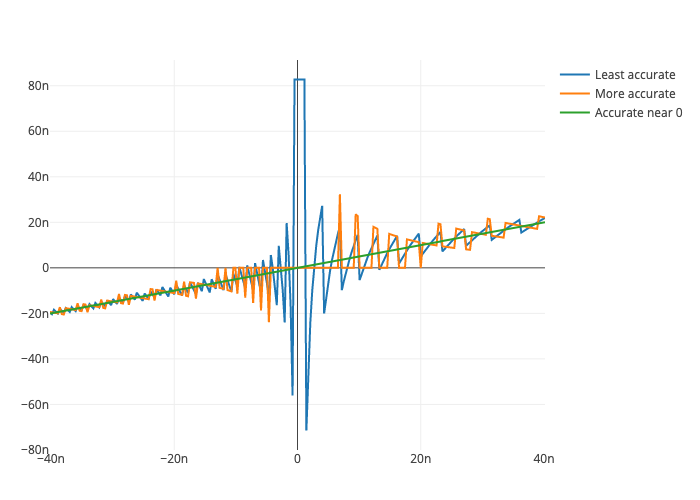

In [12]:
function f(x)
    z = Array{Float64}(undef,length(x))
    for i=1:length(x)
        z[i] = (exp(x[i])-1) / ((1 + x[i]) - 1) - 1
        # Compiler makes unhelpful optimizations if we use (exp(x)-1) ./ ((1+x)-1) - 1
    end
    return z
end
s = 8e-3
#x = 1e-9 * (-1-s/2 : s : 1+s/2)
x = 4e-8 * (-1-s/2 : s : 1+s/2)
t1 = scatter(x=x,y=(exp.(x).-1) ./ x .- 1,name="Least accurate")
t2 = scatter(x=x,y=f(x),name="More accurate")
t3 = scatter(x=x,y=x/2 + x.^2/6 + x.^3/24,name="Accurate near 0")
plot([t1, t2, t3])

In [13]:
@show setprecision(BigFloat,16)
ϵ = 2.0^(-15) + 2.0^(-16)
x0 = 1 + ϵ
x1 = 1

@printf "x0       %.30f\n" x0
@printf "x1       %.30f\n" x1

BF = BigFloat(x0) - BigFloat(x1)
@printf "x-y BF   %.30f\n" BF

fx = x0 - x1
@assert fx == ϵ
@printf "x-y 64   %.30f\n" fx

δf = Float64(BF) - fx
@assert 2.0^(-16) == δf
@printf "For Err  %e\n" δf / fx

δx = δf
@printf "x pertub %.30f\n" δx
x1t = x1 - δx

@printf "f        %.30f\n" x0 - x1t
@printf "B error  %e\n" abs(δx) / x1

setprecision(BigFloat, 16) = 16
x0       1.000045776367187500000000000000
x1       1.000000000000000000000000000000
x-y BF   0.000061035156250000000000000000
x-y 64   0.000045776367187500000000000000
For Err  3.333333e-01
x pertub 0.000015258789062500000000000000
f        0.000061035156250000000000000000
B error  1.525879e-05


In [14]:
U = [1 1; 1 -1]; ϵ = 2.0^(-15)
A = 1/2 * U * diagm(0 => [1,ϵ]) * transpose(U) # Has norm 1
b = [1; 1]; e = [2.0^(-22); 0]
@show ϵ, e
@show A
@show x = A \ b
@show xe = A \ (b + e)
norm(x - xe) / norm(x), 1.0 / ϵ * norm(e)

(ϵ, e) = (3.0517578125e-5, [2.384185791015625e-7, 0.0])
A = [0.5000152587890625 0.4999847412109375; 0.4999847412109375 0.5000152587890625]
x = A \ b = [1.0, 1.0]
xe = A \ (b + e) = [1.0039063692092896, 0.9960938692092894]


(0.003906250001819045, 0.0078125)